In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
X, y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

In [4]:
X[:5]

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791]])

In [5]:
y[:5]

array([1, 0, 0, 0, 1])

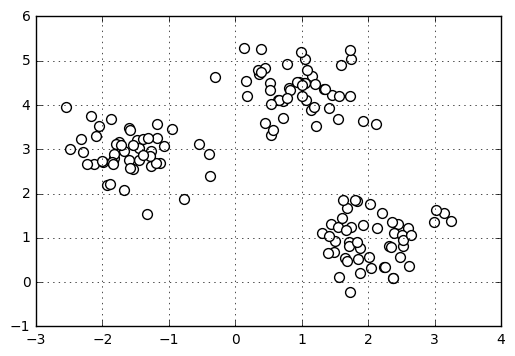

In [7]:
plt.scatter(X[:,0],X[:,1],c='white',marker='o',s=50)
plt.grid()
plt.show()

In [3]:
km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

In [4]:
y_km = km.fit_predict(X)

In [12]:
y_km[:5]

array([1, 0, 0, 0, 1], dtype=int32)

In [13]:
np.unique(y_km)

array([0, 1, 2], dtype=int32)

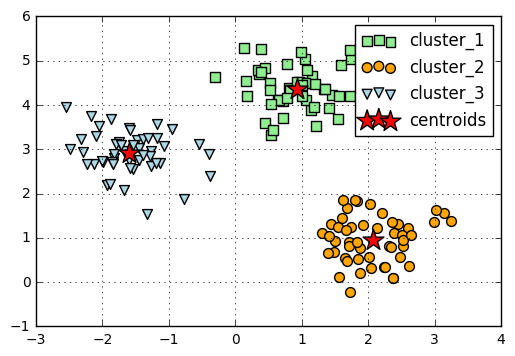

In [16]:
plt.scatter(X[y_km==0,0],
           X[y_km==0,1],
           s=50,
           c='lightgreen',
           marker='s',
           label='cluster_1')

plt.scatter(X[y_km==1,0],
           X[y_km==1,1],
           s=50,
           c='orange',
           marker='o',
           label='cluster_2')

plt.scatter(X[y_km==2,0],
           X[y_km==2,1],
           s=50,
           c='lightblue',
           marker='v',
           label='cluster_3')

plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=250,
           marker='*',
           c='red',
           label='centroids')

plt.legend()
plt.grid()
plt.show()

# Elbow Method

In [5]:
print ('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


In [6]:
distortion = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
    km.fit(X)
    distortion.append(km.inertia_)

In [7]:
print distortion

[713.69982894341592, 283.46101780209307, 72.476016709966984, 62.840617685422217, 53.872026881310433, 47.037259727513671, 41.186489707440757, 35.406070323592402, 30.246853895434089, 27.766482866006289]


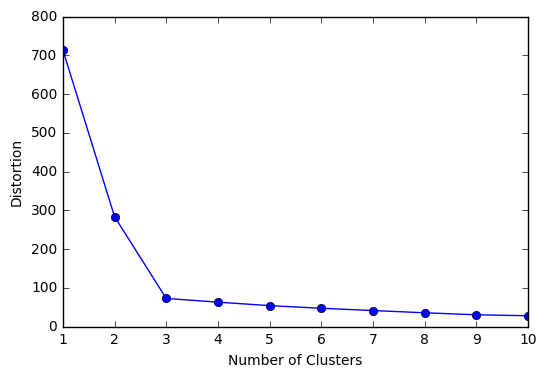

In [8]:
plt.plot(range(1,11), distortion, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [9]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [10]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

In [11]:
silhouette_vals[:5]

array([ 0.75956181,  0.43233677,  0.7747553 ,  0.72286402,  0.76729229])

In [12]:
silhouette_vals.shape[0]

150

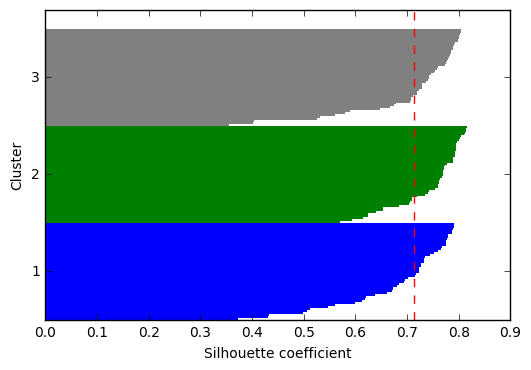

In [36]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
color = ['blue','green','grey']
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    #color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color[i])
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color='red',linestyle='--')
    
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [31]:
yticks

[25, 75, 125]